# Part II: Feature extraction, visualisation, and statistics

## Feature Extraction

In [1]:
# import libraries
import pandas as pd
import string
import collections
import nltk

In [2]:
# read csv
df = pd.read_csv("../Dataset/thebiglist_clean.csv")
df

,Brand,Variety,Style,Country,Stars
0,Higashimaru,Seafood Sara Udon,Pack,Japan,5.0
1,Single Grain,Chongqing Spicy & Sour Rice Noodles,Cup,China,3.5
2,Sau Tao,Seafood Flavour Sichuan Spicy Noodle,Pack,Hong Kong,5.0
3,Sau Tao,Jiangnan Style Noodle - Original Flavour,Pack,Hong Kong,4.5
4,Sapporo Ichiban,CupStar Shio Ramen,Cup,Japan,3.5
...,...,...,...,...,...
3687,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5
3688,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1.0
3689,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2.0
3690,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2.0


In [3]:
# get variety column
variety = df["Variety"]
variety

0                                       Seafood Sara Udon
1                     Chongqing Spicy & Sour Rice Noodles
2                    Seafood Flavour Sichuan Spicy Noodle
3                Jiangnan Style Noodle - Original Flavour
4                                      CupStar Shio Ramen
                              ...                        
3687    Hu Tiu Nam Vang ["Phnom Penh" style] Asian Sty...
3688                       Oriental Style Instant Noodles
3689                                       Tom Yum Shrimp
3690                                 Tom Yum Chili Flavor
3691                                           Miso Ramen
Name: Variety, Length: 3692, dtype: object

In [4]:
# join all items in list into single string
variety_text = " ".join(variety)
variety_text

'Seafood Sara Udon Chongqing Spicy & Sour Rice Noodles Seafood Flavour Sichuan Spicy Noodle Jiangnan Style Noodle - Original Flavour CupStar Shio Ramen Big Boss Broad Noodle Chili Oil Flavor (Sour & Hot) Top Ramen Masala Noodles Miyashi Chuka Cold Noodle Tanukioyaji Super Spicy Mazemen Michio Kawamura Nature Ramen Shio Mochichi Wonton Noodle Instant Yakosoba XL Chajang (Bean Sauce) Flavor Spicy Baby Clam Flavor Cup Instant Rice Noodles Oriental Kitchen Hot Korean Instant Noodles Coconut Chicken Curry Rice Noodle Soup Shoyu Flavor Karaage Ginger Shio Ramen Raoh Soy Sauce Flavor Ramen Souper Bowl Noodle Pho Rice Noodle Mild Sekai no Yamachan Phantom Chicken Wings Yakisoba Artificial Beef With Sauerkraut Quick Pasta Creamy Icon Ramen Noodles Creamy Chicken Gumbo Mi Instant Rasa Vegetarian Shin Red Super Spicy Buldak Challenge Daimori Osaka Kasoudon Pepper Sesame Red Oil Sesame Paste Fragrant In Original Taste Sesame Paste Kiseki Ramen Chicken Flavor Ramen Hotter & Spicier Ramen Beef Flavo

In [5]:
# lowercase
variety_text_lower = variety_text.lower()
variety_text_lower

'seafood sara udon chongqing spicy & sour rice noodles seafood flavour sichuan spicy noodle jiangnan style noodle - original flavour cupstar shio ramen big boss broad noodle chili oil flavor (sour & hot) top ramen masala noodles miyashi chuka cold noodle tanukioyaji super spicy mazemen michio kawamura nature ramen shio mochichi wonton noodle instant yakosoba xl chajang (bean sauce) flavor spicy baby clam flavor cup instant rice noodles oriental kitchen hot korean instant noodles coconut chicken curry rice noodle soup shoyu flavor karaage ginger shio ramen raoh soy sauce flavor ramen souper bowl noodle pho rice noodle mild sekai no yamachan phantom chicken wings yakisoba artificial beef with sauerkraut quick pasta creamy icon ramen noodles creamy chicken gumbo mi instant rasa vegetarian shin red super spicy buldak challenge daimori osaka kasoudon pepper sesame red oil sesame paste fragrant in original taste sesame paste kiseki ramen chicken flavor ramen hotter & spicier ramen beef flavo

In [6]:
# string containing common punctuations
punc_list = list(string.punctuation)
punc_list

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [7]:
# single character, omit elements in punc_list
variety_clean = "".join([char for char in variety_text_lower if char not in punc_list])
variety_clean

'seafood sara udon chongqing spicy  sour rice noodles seafood flavour sichuan spicy noodle jiangnan style noodle  original flavour cupstar shio ramen big boss broad noodle chili oil flavor sour  hot top ramen masala noodles miyashi chuka cold noodle tanukioyaji super spicy mazemen michio kawamura nature ramen shio mochichi wonton noodle instant yakosoba xl chajang bean sauce flavor spicy baby clam flavor cup instant rice noodles oriental kitchen hot korean instant noodles coconut chicken curry rice noodle soup shoyu flavor karaage ginger shio ramen raoh soy sauce flavor ramen souper bowl noodle pho rice noodle mild sekai no yamachan phantom chicken wings yakisoba artificial beef with sauerkraut quick pasta creamy icon ramen noodles creamy chicken gumbo mi instant rasa vegetarian shin red super spicy buldak challenge daimori osaka kasoudon pepper sesame red oil sesame paste fragrant in original taste sesame paste kiseki ramen chicken flavor ramen hotter  spicier ramen beef flavor ramen 

In [8]:
# individual strings
variety_tokens = nltk.tokenize.word_tokenize(variety_clean)
variety_tokens

['seafood',
 'sara',
 'udon',
 'chongqing',
 'spicy',
 'sour',
 'rice',
 'noodles',
 'seafood',
 'flavour',
 'sichuan',
 'spicy',
 'noodle',
 'jiangnan',
 'style',
 'noodle',
 'original',
 'flavour',
 'cupstar',
 'shio',
 'ramen',
 'big',
 'boss',
 'broad',
 'noodle',
 'chili',
 'oil',
 'flavor',
 'sour',
 'hot',
 'top',
 'ramen',
 'masala',
 'noodles',
 'miyashi',
 'chuka',
 'cold',
 'noodle',
 'tanukioyaji',
 'super',
 'spicy',
 'mazemen',
 'michio',
 'kawamura',
 'nature',
 'ramen',
 'shio',
 'mochichi',
 'wonton',
 'noodle',
 'instant',
 'yakosoba',
 'xl',
 'chajang',
 'bean',
 'sauce',
 'flavor',
 'spicy',
 'baby',
 'clam',
 'flavor',
 'cup',
 'instant',
 'rice',
 'noodles',
 'oriental',
 'kitchen',
 'hot',
 'korean',
 'instant',
 'noodles',
 'coconut',
 'chicken',
 'curry',
 'rice',
 'noodle',
 'soup',
 'shoyu',
 'flavor',
 'karaage',
 'ginger',
 'shio',
 'ramen',
 'raoh',
 'soy',
 'sauce',
 'flavor',
 'ramen',
 'souper',
 'bowl',
 'noodle',
 'pho',
 'rice',
 'noodle',
 'mild',
 

In [9]:
# dictionary of frequency
variety_counter = collections.Counter(variety_tokens)
variety_counter

Counter({'seafood': 140,
         'sara': 3,
         'udon': 124,
         'chongqing': 10,
         'spicy': 413,
         'sour': 59,
         'rice': 178,
         'noodles': 889,
         'flavour': 517,
         'sichuan': 31,
         'noodle': 762,
         'jiangnan': 3,
         'style': 122,
         'original': 42,
         'cupstar': 5,
         'shio': 50,
         'ramen': 630,
         'big': 58,
         'boss': 2,
         'broad': 9,
         'chili': 58,
         'oil': 54,
         'flavor': 491,
         'hot': 187,
         'top': 28,
         'masala': 24,
         'miyashi': 1,
         'chuka': 6,
         'cold': 14,
         'tanukioyaji': 1,
         'super': 44,
         'mazemen': 1,
         'michio': 3,
         'kawamura': 3,
         'nature': 3,
         'mochichi': 1,
         'wonton': 13,
         'instant': 560,
         'yakosoba': 1,
         'xl': 2,
         'chajang': 5,
         'bean': 33,
         'sauce': 211,
         'baby': 6,
       

In [10]:
# auto arrange
variety_counter.most_common()

[('noodles', 889),
 ('noodle', 762),
 ('ramen', 630),
 ('instant', 560),
 ('flavour', 517),
 ('flavor', 491),
 ('chicken', 419),
 ('spicy', 413),
 ('soup', 314),
 ('beef', 314),
 ('cup', 252),
 ('with', 224),
 ('sauce', 211),
 ('curry', 188),
 ('hot', 187),
 ('rice', 178),
 ('tom', 152),
 ('shrimp', 151),
 ('artificial', 149),
 ('mi', 142),
 ('seafood', 140),
 ('pork', 140),
 ('bowl', 138),
 ('udon', 124),
 ('style', 122),
 ('tonkotsu', 108),
 ('yum', 107),
 ('yakisoba', 99),
 ('goreng', 96),
 ('sesame', 89),
 ('vermicelli', 85),
 ('miso', 81),
 ('shoyu', 77),
 ('oriental', 71),
 ('vegetable', 71),
 ('soy', 70),
 ('kimchi', 68),
 ('demae', 67),
 ('penang', 66),
 ('vegetarian', 61),
 ('mushroom', 61),
 ('sour', 59),
 ('big', 58),
 ('chili', 58),
 ('black', 56),
 ('fried', 56),
 ('oil', 54),
 ('rasa', 52),
 ('sabor', 52),
 ('ramyun', 52),
 ('laksa', 51),
 ('shio', 50),
 ('soba', 50),
 ('thai', 50),
 ('japanese', 49),
 ('korean', 48),
 ('taste', 48),
 ('tomato', 47),
 ('chow', 47),
 ('pep

In [11]:
is_spicy = []

hot_flavor = ["spicy",
             "curry",
             "hot",
             "tom",
             "chili",
             "chilli",
             "kari",
             "pedas",
             "laksa"]

# any() useful for comparing 2 lists
for variety in df["Variety"].str.lower():
    # detect any of the hot_flavor
    if any(flavor in variety for flavor in hot_flavor):
        is_spicy.append(1)
    else:
        is_spicy.append(0)
  
df['isSpicy'] = is_spicy
df

,Brand,Variety,Style,Country,Stars,isSpicy
0,Higashimaru,Seafood Sara Udon,Pack,Japan,5.0,0
1,Single Grain,Chongqing Spicy & Sour Rice Noodles,Cup,China,3.5,1
2,Sau Tao,Seafood Flavour Sichuan Spicy Noodle,Pack,Hong Kong,5.0,1
3,Sau Tao,Jiangnan Style Noodle - Original Flavour,Pack,Hong Kong,4.5,0
4,Sapporo Ichiban,CupStar Shio Ramen,Cup,Japan,3.5,0
...,...,...,...,...,...,...
3687,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5,0
3688,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1.0,0
3689,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2.0,1
3690,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2.0,1


In [12]:
has_chicken = []

for variety in df["Variety"].str.lower():
    if ('chicken' in variety) or ('ayam' in variety):
        has_chicken.append(1)
    else:
        has_chicken.append(0)
        
df['hasChicken'] = has_chicken
df

,Brand,Variety,Style,Country,Stars,isSpicy,hasChicken
0,Higashimaru,Seafood Sara Udon,Pack,Japan,5.0,0,0
1,Single Grain,Chongqing Spicy & Sour Rice Noodles,Cup,China,3.5,1,0
2,Sau Tao,Seafood Flavour Sichuan Spicy Noodle,Pack,Hong Kong,5.0,1,0
3,Sau Tao,Jiangnan Style Noodle - Original Flavour,Pack,Hong Kong,4.5,0,0
4,Sapporo Ichiban,CupStar Shio Ramen,Cup,Japan,3.5,0,0
...,...,...,...,...,...,...,...
3687,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5,0,0
3688,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1.0,0,0
3689,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2.0,1,0
3690,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2.0,1,0


In [13]:
df.sample(10)

,Brand,Variety,Style,Country,Stars,isSpicy,hasChicken
1112,Daikoku,Kaisen (seafood) Shio Noodles,Cup,Japan,5.00,0,0
567,Liangchengmei,Biang Biang Men,Box,China,5.00,0,0
2624,Koka,Oriental Instant Noodles Stir Fried Noodles,Pack,Singapore,3.75,0,0
3124,Paldo,Gomtang,Cup,South Korea,4.00,0,0
125,Sau Tao,E-Fu Noodle Curry Lobster Soup Flavour,Pack,Hong Kong,4.00,1,0
1198,Nissin,Soba Thai,Pack,Germany,4.50,0,0
943,TTL,Carbonara White Wine Sauce Noodle,Pack,Taiwan,5.00,0,0
1082,Gookmul,Special Edition Lobster,Pack,South Korea,3.50,0,0
1338,Marutai,Nagasaki Agodashi Shoyu Ramen,Pack,Japan,3.50,0,0
3,Sau Tao,Jiangnan Style Noodle - Original Flavour,Pack,Hong Kong,4.50,0,0


In [14]:
has_beef = []

for variety in df["Variety"].str.lower():
    if ('beef' in variety) or ('cow' in variety):
        has_beef.append(1)
    else:
        has_beef.append(0)
        
df['hasBeef'] = has_beef
df

,Brand,Variety,Style,Country,Stars,isSpicy,hasChicken,hasBeef
0,Higashimaru,Seafood Sara Udon,Pack,Japan,5.0,0,0,0
1,Single Grain,Chongqing Spicy & Sour Rice Noodles,Cup,China,3.5,1,0,0
2,Sau Tao,Seafood Flavour Sichuan Spicy Noodle,Pack,Hong Kong,5.0,1,0,0
3,Sau Tao,Jiangnan Style Noodle - Original Flavour,Pack,Hong Kong,4.5,0,0,0
4,Sapporo Ichiban,CupStar Shio Ramen,Cup,Japan,3.5,0,0,0
...,...,...,...,...,...,...,...,...
3687,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5,0,0,0
3688,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1.0,0,0,0
3689,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2.0,1,0,0
3690,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2.0,1,0,0


In [15]:
df.sample(10)

,Brand,Variety,Style,Country,Stars,isSpicy,hasChicken,hasBeef
646,Conimex,Oriental Noodles Thom Khakai,Cup,Netherlands,3.00,0,0,0
1064,Samyang Foods,Ramen Bokki,Cup,South Korea,4.50,0,0,0
3045,Sunlee,Tom Yum Shrimp Noodle,Bowl,Thailand,3.50,1,0,0
2935,Indomie,Mi Goreng Vegan,Pack,Indonesia,4.25,0,0,0
1170,Nissin,Straits Reborn Laksa,Pack,Singapore,5.00,1,0,0
2667,Samyang Foods,Hot Chacharoni,Pack,South Korea,3.75,1,0,0
32,Ramen Express By Chef Woo,Chicken Flavor Ramen,Cup,United States,3.00,0,1,0
2274,Ottogi,Ppushu Ppushu Grilled Chicken Flavor,Pack,South Korea,1.00,0,1,0
2494,Samyang Foods,Maesaengyitangmyun Baked Noodle,Pack,South Korea,5.00,0,0,0
1443,Nissin,Demae Iccho Spicy XO Sauce Seafood Flavour,Pack,Hong Kong,4.00,1,0,0


In [16]:
has_seafood = []

seafood_flavor = ["seafood",
                 "fish",
                 "shrimp",
                 "crab",
                 "prawn"]

for variety in df["Variety"].str.lower():
    if any(flavor in variety for flavor in seafood_flavor):
        has_seafood.append(1)
    else:
        has_seafood.append(0)
  
df['hasSeafood'] = has_seafood
df

,Brand,Variety,Style,Country,Stars,isSpicy,hasChicken,hasBeef,hasSeafood
0,Higashimaru,Seafood Sara Udon,Pack,Japan,5.0,0,0,0,1
1,Single Grain,Chongqing Spicy & Sour Rice Noodles,Cup,China,3.5,1,0,0,0
2,Sau Tao,Seafood Flavour Sichuan Spicy Noodle,Pack,Hong Kong,5.0,1,0,0,1
3,Sau Tao,Jiangnan Style Noodle - Original Flavour,Pack,Hong Kong,4.5,0,0,0,0
4,Sapporo Ichiban,CupStar Shio Ramen,Cup,Japan,3.5,0,0,0,0
...,...,...,...,...,...,...,...,...,...
3687,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5,0,0,0,0
3688,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1.0,0,0,0,0
3689,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2.0,1,0,0,1
3690,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2.0,1,0,0,0


## Data Exploration

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
brand_count = df['Brand'].value_counts()[:50]
brand_count

Nissin               476
Maruchan             131
Nongshim             119
Myojo                111
Samyang Foods        102
Paldo                 84
Mama                  71
Sapporo Ichiban       69
Indomie               56
Ottogi                50
Sau Tao               48
Acecook               48
KOKA                  39
Maggi                 38
Vifon                 36
MyKuali               35
Mamee                 34
Lucky Me!             34
Vina Acecook          34
MAMA                  33
Ve Wong               32
Master Kong           29
JML                   28
Vedan                 28
Wei Lih               28
A-Sha Dry Noodle      26
Wai Wai               26
Wu-Mu                 23
Yum Yum               23
Itsuki                20
Samyang               19
New Touch             18
Sichuan Baijia        18
Doll                  18
Koka                  18
Uni-President         18
Little Cook           17
Mr. Noodles           16
Batchelors            16
Kamfen                15


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(

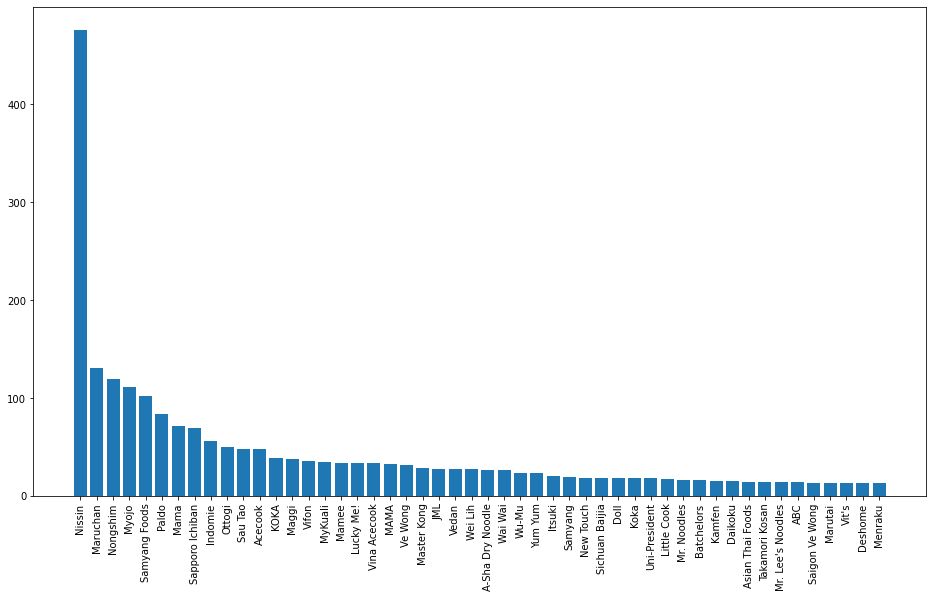

In [19]:
# plot a barplot for brand_count
plt.figure(figsize=(16,9))
plt.bar(brand_count.index, brand_count) #x, y
plt.xticks(rotation=90)

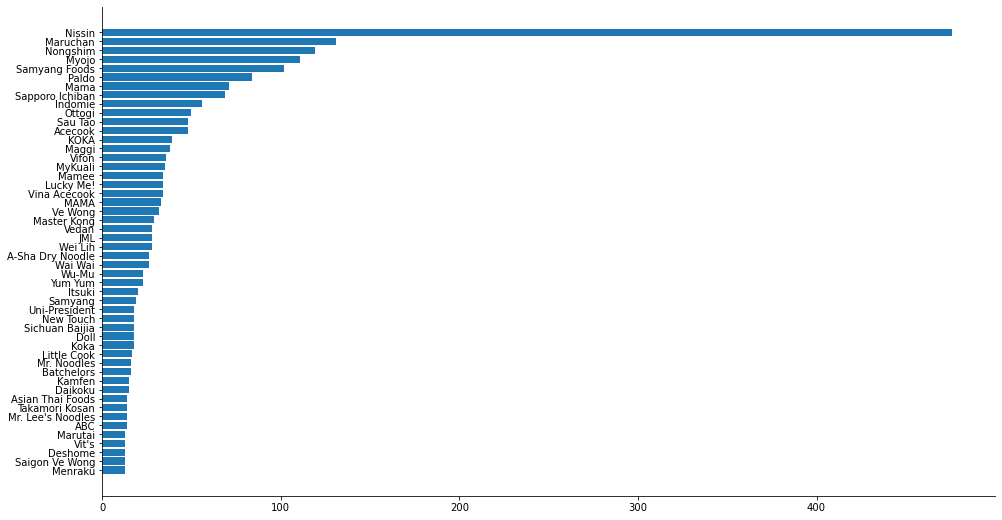

In [20]:
# horizontal
plt.figure(figsize=(16,9))
plt.barh(brand_count.sort_values(ascending=True).index,
         brand_count.sort_values(ascending=True)) #x, y

sns.despine()

In [21]:
# explore style
style_count = df['Style'].value_counts()
style_count

Pack          2085
Bowl           722
Cup            659
Tray           167
Box             54
Restaurant       3
Bar              1
Can              1
Name: Style, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

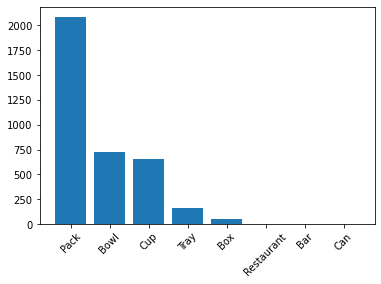

In [22]:
plt.bar(style_count.index, style_count)
plt.xticks(rotation=45)

In [23]:
# explore Country column
country_count = df['Country'].value_counts()
country_count

Japan                 681
United States         458
South Korea           411
Taiwan                372
China                 245
Thailand              212
Malaysia              207
Hong Kong             191
Indonesia             161
Singapore             140
Vietnam               124
UK                     75
Canada                 56
Philippines            51
India                  45
Mexico                 32
Germany                28
Australia              25
Brazil                 24
Netherlands            16
Myanmar                14
Nepal                  14
Bangladesh             12
Pakistan                9
Hungary                 9
Poland                  6
France                  6
Colombia                6
Russia                  5
Cambodia                5
Sarawak                 5
Holland                 4
Peru                    4
Fiji                    4
Italy                   4
Spain                   3
Ukraine                 3
Sweden                  3
Israel      

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
 

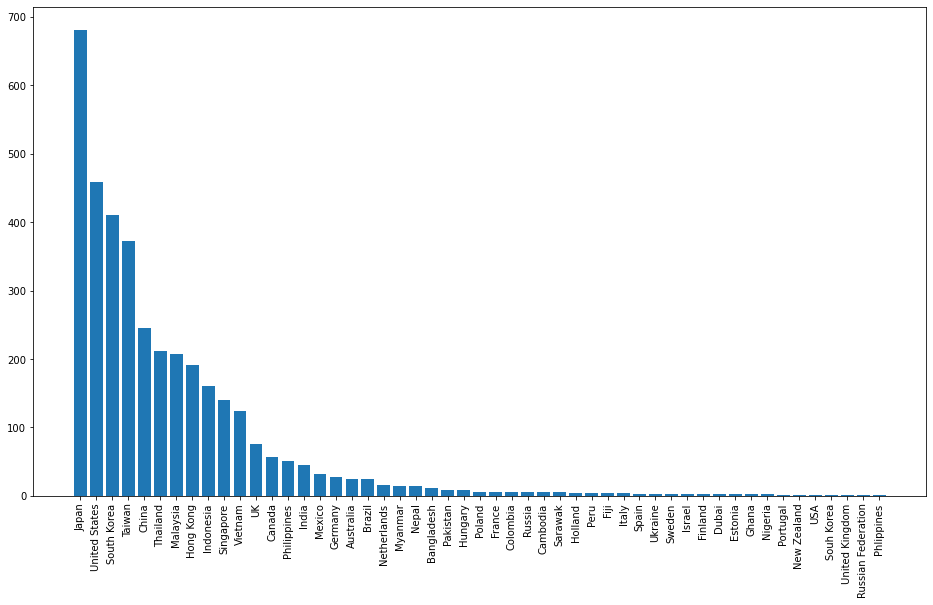

In [24]:
plt.figure(figsize=(16,9))
plt.bar(country_count.index, country_count)
plt.xticks(rotation=90)

(array([  58.,   23.,   54.,   79.,  127.,  210.,  399., 1081.,  658.,
        1003.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

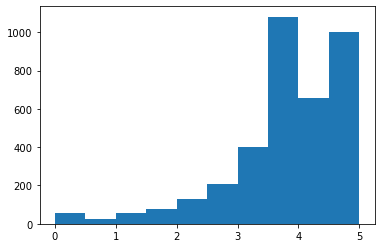

In [25]:
# examine distribution of scores in "Stars"
plt.hist(df['Stars'])

Data is skewed and not normally distributed.

In [26]:
df["Stars"].median()

3.75

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='isSpicy', ylabel='count'>

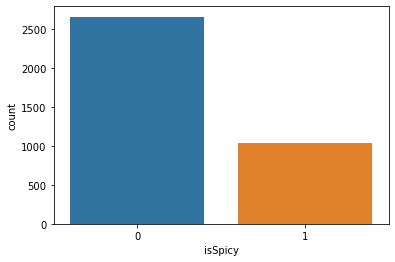

In [27]:
sns.countplot(df['isSpicy'])

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hasChicken', ylabel='count'>

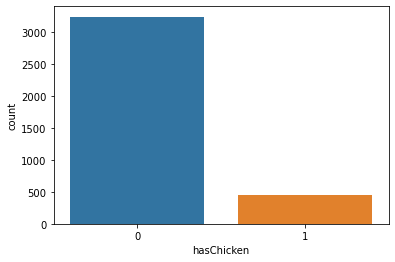

In [28]:
sns.countplot(df['hasChicken'])

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hasBeef', ylabel='count'>

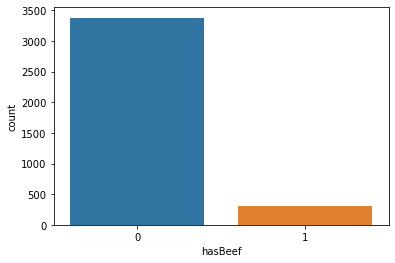

In [29]:
sns.countplot(df['hasBeef'])

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hasSeafood', ylabel='count'>

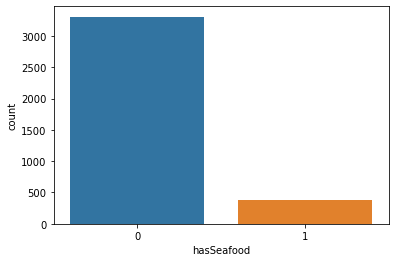

In [30]:
sns.countplot(df['hasSeafood'])

Questions to ask:
1. Which brand has the highest stars?
2. Which country has the highest stars?
3. Which noodle has higher Stars - spicy or non-spicy?

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Nissin'),
  Text(1, 0, 'Maruchan'),
  Text(2, 0, 'Nongshim'),
  Text(3, 0, 'Myojo'),
  Text(4, 0, 'Samyang Foods'),
  Text(5, 0, 'Paldo'),
  Text(6, 0, 'Mama'),
  Text(7, 0, 'Sapporo Ichiban'),
  Text(8, 0, 'Indomie'),
  Text(9, 0, 'Ottogi'),
  Text(10, 0, 'Sau Tao'),
  Text(11, 0, 'Acecook'),
  Text(12, 0, 'KOKA'),
  Text(13, 0, 'Maggi'),
  Text(14, 0, 'Vifon'),
  Text(15, 0, 'MyKuali'),
  Text(16, 0, 'Mamee'),
  Text(17, 0, 'Lucky Me!'),
  Text(18, 0, 'Vina Acecook'),
  Text(19, 0, 'MAMA')])

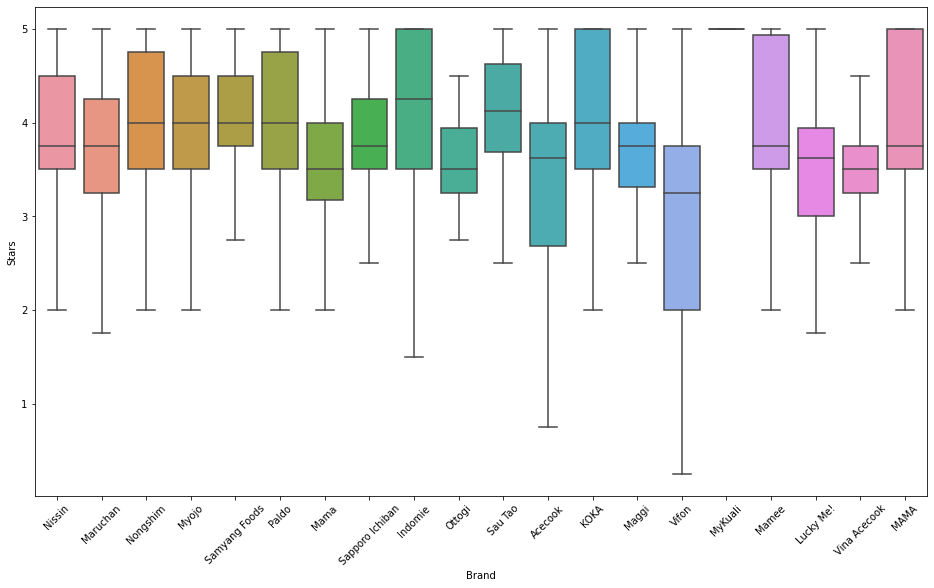

In [31]:
# Question 1: Which brand has the highest stars?
plt.figure(figsize = (16,9))
sns.boxplot(df["Brand"], df["Stars"],
            order=brand_count.index[:20],
           showfliers=False) # don't show outliers
plt.xticks(rotation=45)

In [32]:
# MyKuali is the highest rated (highest median)
df[df["Brand"] == "MyKuali"]

,Brand,Variety,Style,Country,Stars,isSpicy,hasChicken,hasBeef,hasSeafood
188,MyKuali,White Fish Broth Cup Noodle,Cup,Malaysia,5.00,0,0,0,1
199,MyKuali,Penang Red Tom Yum Goong Rice Vermicelli Soup ...,Bowl,Malaysia,5.00,1,0,0,0
213,MyKuali,White Fish Broth Rice Vermicelli,Bowl,Malaysia,5.00,0,0,0,1
229,MyKuali,White Fish Broth Noodle,Pack,Malaysia,5.00,0,0,0,1
230,MyKuali,Penang White Curry Noodle (New Recipe),Pack,Malaysia,5.00,1,0,0,0
490,MyKuali,Gaeng Som Noodle,Cup,Malaysia,4.50,0,0,0,0
942,MyKuali,Hokkien Prawn (2018 Recipe),Pack,Malaysia,5.00,0,0,0,1
951,MyKuali,Penang Red Tom Yum Goong Noodle (2018 Recipe),Pack,Malaysia,5.00,1,0,0,0
958,MyKuali,Penang White Curry Noodle (2018 Recipe),Pack,Malaysia,5.00,1,0,0,0
1020,MyKuali,Penang White Curry Noodle,Pack,Malaysia,5.00,1,0,0,0


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Japan'),
  Text(1, 0, 'United States'),
  Text(2, 0, 'South Korea'),
  Text(3, 0, 'Taiwan'),
  Text(4, 0, 'China'),
  Text(5, 0, 'Thailand'),
  Text(6, 0, 'Malaysia'),
  Text(7, 0, 'Hong Kong'),
  Text(8, 0, 'Indonesia'),
  Text(9, 0, 'Singapore'),
  Text(10, 0, 'Vietnam'),
  Text(11, 0, 'UK'),
  Text(12, 0, 'Canada'),
  Text(13, 0, 'Philippines'),
  Text(14, 0, 'India'),
  Text(15, 0, 'Mexico'),
  Text(16, 0, 'Germany'),
  Text(17, 0, 'Australia'),
  Text(18, 0, 'Brazil'),
  Text(19, 0, 'Netherlands')])

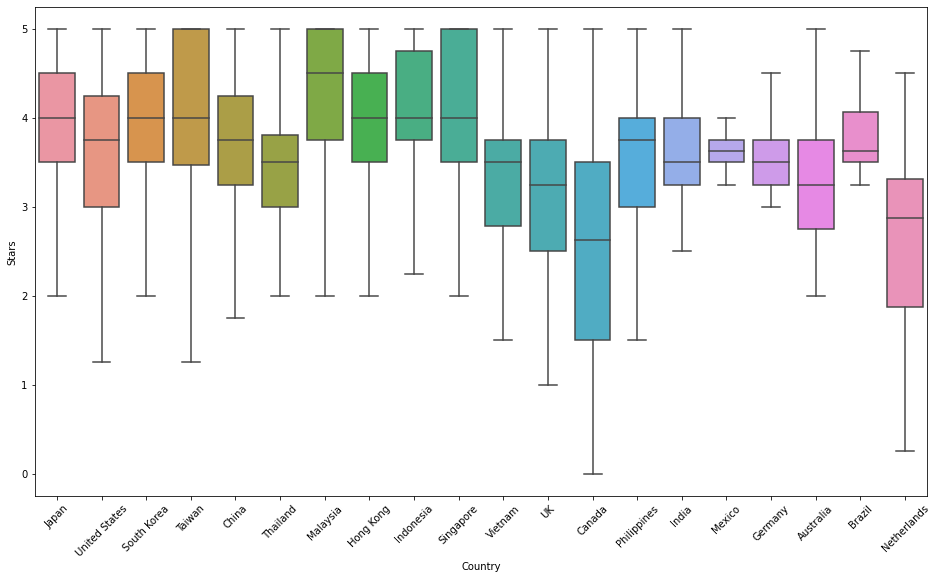

In [33]:
# Question 1: Which country has the highest stars?
plt.figure(figsize = (16,9))
sns.boxplot(df["Country"], df["Stars"],
            order=country_count.index[:20],
           showfliers=False) # don't show outliers
plt.xticks(rotation=45)

Malaysia is doing well.

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='isSpicy', ylabel='Stars'>

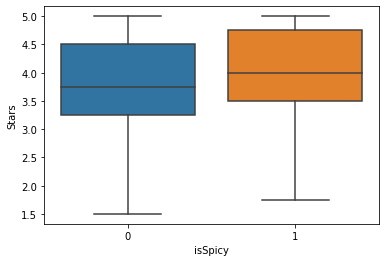

In [34]:
# Question 3: Which noodle has higher Stars - spicy or non-spicy?
sns.boxplot(df['isSpicy'], df['Stars'], showfliers=False)

In [35]:
# filter two DataFrames
spicy_df = df[df["isSpicy"] == 1]
non_spicy_df = df[df["isSpicy"] == 0]

In [36]:
print(spicy_df["Stars"].mean())
print(non_spicy_df["Stars"].mean())

3.845135527589545
3.675112824370064


In [37]:
print(spicy_df["Stars"].median())
print(non_spicy_df["Stars"].median())

4.0
3.75


(array([ 44.,  17.,  43.,  64.,  83., 171., 309., 799., 453., 676.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

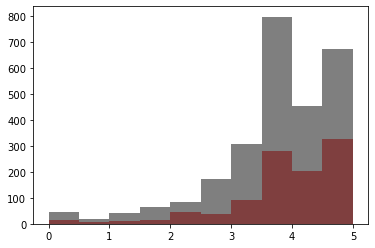

In [38]:
# perform statistical test
# no t-test since not normally distributed
plt.hist(spicy_df["Stars"], alpha=0.5, color='red')
plt.hist(non_spicy_df["Stars"], alpha=0.5, color='black')

# similar distribution, diff frequency

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Stars', ylabel='Density'>

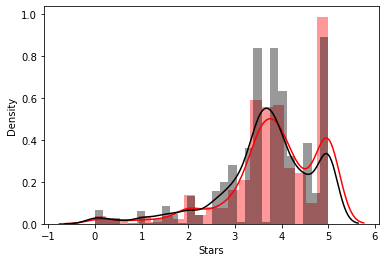

In [39]:
# on same scale
sns.distplot(spicy_df["Stars"], color='red')
sns.distplot(non_spicy_df["Stars"], color='black')

In [40]:
# import mann-whitney u test
from scipy.stats import mannwhitneyu

In [41]:
mannwhitneyu(spicy_df["Stars"],
            non_spicy_df["Stars"])

# if p-value < 0.05, there is statistical significance in the difference
# thus spicy are rated higher than non-spicy

MannwhitneyuResult(statistic=1525932.5, pvalue=1.2489797441151044e-07)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hasChicken', ylabel='Stars'>

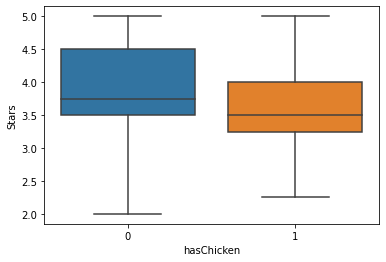

In [42]:
sns.boxplot(df["hasChicken"], df["Stars"], showfliers=False)

In [43]:
mannwhitneyu(df[df['hasChicken'] == 0]["Stars"],
            df[df['hasChicken'] == 1]["Stars"])

MannwhitneyuResult(statistic=854504.0, pvalue=4.504929299075213e-10)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hasBeef', ylabel='Stars'>

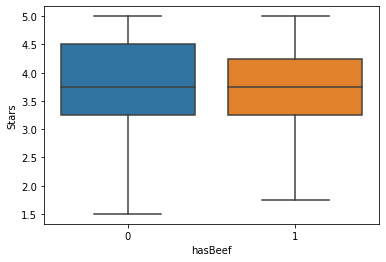

In [44]:
sns.boxplot(df["hasBeef"], df["Stars"], showfliers=False)

In [45]:
mannwhitneyu(df[df['hasBeef'] == 0]["Stars"],
            df[df['hasBeef'] == 1]["Stars"])

MannwhitneyuResult(statistic=580962.5, pvalue=0.0035913084409697612)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hasSeafood', ylabel='Stars'>

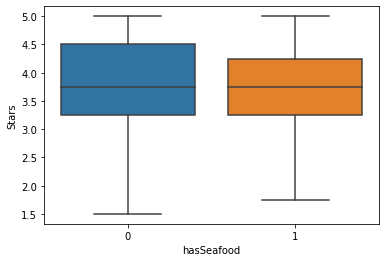

In [46]:
sns.boxplot(df["hasSeafood"], df["Stars"], showfliers=False)

In [47]:
mannwhitneyu(df[df['hasSeafood'] == 0]["Stars"],
            df[df['hasSeafood'] == 1]["Stars"])

# difference not statistically significant

MannwhitneyuResult(statistic=646968.5, pvalue=0.597640184021512)

In [48]:
df

,Brand,Variety,Style,Country,Stars,isSpicy,hasChicken,hasBeef,hasSeafood
0,Higashimaru,Seafood Sara Udon,Pack,Japan,5.0,0,0,0,1
1,Single Grain,Chongqing Spicy & Sour Rice Noodles,Cup,China,3.5,1,0,0,0
2,Sau Tao,Seafood Flavour Sichuan Spicy Noodle,Pack,Hong Kong,5.0,1,0,0,1
3,Sau Tao,Jiangnan Style Noodle - Original Flavour,Pack,Hong Kong,4.5,0,0,0,0
4,Sapporo Ichiban,CupStar Shio Ramen,Cup,Japan,3.5,0,0,0,0
...,...,...,...,...,...,...,...,...,...
3687,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5,0,0,0,0
3688,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1.0,0,0,0,0
3689,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2.0,1,0,0,1
3690,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2.0,1,0,0,0


In [49]:
df.to_csv("../Dataset/thebiglist_clean_extended.csv", index=None)

In [50]:
pd.read_csv("../Dataset/thebiglist_clean_extended.csv")

,Brand,Variety,Style,Country,Stars,isSpicy,hasChicken,hasBeef,hasSeafood
0,Higashimaru,Seafood Sara Udon,Pack,Japan,5.0,0,0,0,1
1,Single Grain,Chongqing Spicy & Sour Rice Noodles,Cup,China,3.5,1,0,0,0
2,Sau Tao,Seafood Flavour Sichuan Spicy Noodle,Pack,Hong Kong,5.0,1,0,0,1
3,Sau Tao,Jiangnan Style Noodle - Original Flavour,Pack,Hong Kong,4.5,0,0,0,0
4,Sapporo Ichiban,CupStar Shio Ramen,Cup,Japan,3.5,0,0,0,0
...,...,...,...,...,...,...,...,...,...
3687,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5,0,0,0,0
3688,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1.0,0,0,0,0
3689,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2.0,1,0,0,1
3690,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2.0,1,0,0,0


Summary:
1. Examined Variety column
2. Extracted useful information from Variety
    - isSpicy
    - hasChicken
    - hasBeef
    - hasSeafood
3. Performed visualisations to answer several questions
4. Exported extended DataFrame